In [65]:
import os
import cv2
import numpy as np
import tensorflow as tf
import sys
from PIL import Image
from utils import label_map_util
from utils import visualization_utils as vis_util
import matplotlib.pyplot as plt
from pprint import pprint

In [66]:
%matplotlib inline

In [67]:
MODEL_NAME = 'inference_graph'
cwd = os.getcwd()
ckpt_path = os.path.join(cwd,MODEL_NAME,'frozen_inference_graph.pb')
#label_pbtxt_path = os.path.join(cwd,'training','labelmap.pbtxt')
PATH_TO_LABELS = os.path.join('data', 'mscoco_label_map.pbtxt')

num_classes = 90


In [68]:
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]


In [69]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [70]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(ckpt_path, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

In [71]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


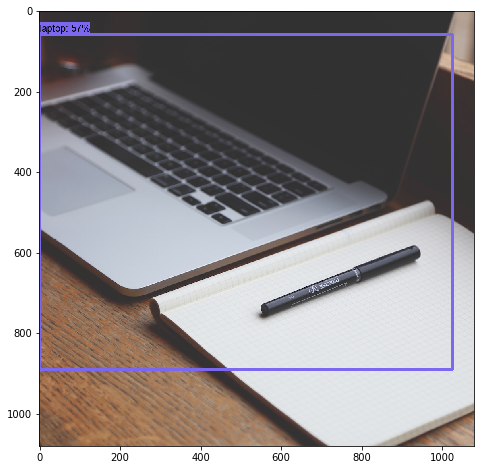

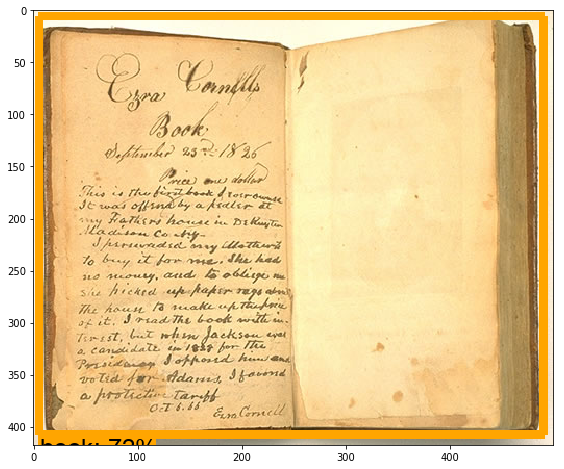

In [72]:
IMAGE_SIZE = (12, 8)
for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    
    image_np = load_image_into_numpy_array(image)
    
    image_expanded = np.expand_dims(image, axis=0)
    
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    
    (boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})
    
    vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8
    )
    
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
